# Parameters

In [328]:
TRAIN_SIZE = 1200000
MIN_PATH_ROOT_SAMPLE = 15000

# Packages

In [1]:
#main packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

# Global helper functions

In [277]:
def get_root(s):
    if s.startswith('/') and len(s) > 1:
        s = s[1:]
    if len(s) > 1:
        s = s[:s.find('/')]
    return s

In [344]:
def get_path_roots(urls, min_samples_per_root=1000):
    t = [get_root(s) for s in urls]

    t = ['robots' if 'robots' in s else s for s in t]
    t = ['NUM' if s.isnumeric() else s for s in t]

    t2 = pd.Series(t).value_counts()[pd.Series(t).value_counts().values > min_samples_per_root]
    if 'robots' not in t2:
        roots = np.concatenate((t2.index.values, ['robots']))
        values = np.concatenate((t2.values, [pd.Series(t).value_counts()['robots']]))
    else:
        roots = np.array(t2.index.values)
        values = np.array(t2.values)
    return roots, values

# Dataset

In [53]:
df = pd.read_json('../result.json')

In [87]:
train = df[:TRAIN_SIZE]
valid = df[TRAIN_SIZE:]

In [88]:
train.shape, valid.shape

((1200000, 8), (60035, 8))

In [84]:
len(df[df.ip == '-'])

18090

In [89]:
len(df[[s == ['kube-probe/1.21'] for s in df.http_user_agent]])

18090

In [59]:
def isnumeric(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [70]:
df[[not isnumeric(s) for s in df.request_time]][12:32]

,datetime,http_user_agent,ip,status_code,request_length,request_time,http_method,url
643,2021-05-12 05:06:25+04:30,[kube-probe/1.21],-,301,169,-,Get,/
675,2021-05-12 05:06:27+04:30,[kube-probe/1.21],-,301,169,-,Get,/
720,2021-05-12 05:06:29+04:30,[kube-probe/1.21],-,301,169,-,Get,/
775,2021-05-12 05:06:31+04:30,[kube-probe/1.21],-,301,169,-,Get,/
776,2021-05-12 05:06:31+04:30,"[[compatible, SemrushBot/7~bl, +http://www.sem...",20.62.177.11,200,53479,-,Get,/pros/1993352776
800,2021-05-12 05:06:33+04:30,[kube-probe/1.21],-,301,169,-,Get,/
821,2021-05-12 05:06:35+04:30,[kube-probe/1.21],-,301,169,-,Get,/
842,2021-05-12 05:06:37+04:30,[kube-probe/1.21],-,301,169,-,Get,/
845,2021-05-12 05:06:39+04:30,[kube-probe/1.21],-,301,169,-,Get,/
880,2021-05-12 05:06:41+04:30,[kube-probe/1.21],-,301,169,-,Get,/


In [3]:
df = df.loc[df.request_time.apply(lambda x: x.isnumeric())]
df.request_time = df.request_time.astype('int64')

### Preview data

In [98]:
train.head()

,datetime,http_user_agent,ip,status_code,request_length,request_time,http_method,url
0,2021-05-12 05:06:00+04:30,[Googlebot-Image/1.0],207.213.193.143,304,0,32,Get,/cdn/profiles/1026106239
1,2021-05-12 05:06:00+04:30,[Googlebot-Image/1.0],207.213.193.143,304,0,4,Get,images/badge.png
2,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...",35.110.222.153,200,52567,32,Get,/pages/630180847
3,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0, CAM-L21], [KHTML, like G...",35.108.208.99,200,23531,20,Get,images/fav_icon2.ico
4,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...",35.110.222.153,200,4680,8,Get,images/sanjagh_logo_purpule5.png


In [99]:
train.describe()

,status_code,request_length
count,1.200000e+06,1.200000e+06
mean,2.314949e+02,4.528326e+04
std,5.795523e+01,3.274821e+05
min,1.010000e+02,0.000000e+00
25%,2.000000e+02,0.000000e+00
50%,2.000000e+02,1.201000e+03
75%,3.040000e+02,2.674300e+04
max,5.030000e+02,1.022335e+08


In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype                                
---  ------           --------------    -----                                
 0   datetime         1200000 non-null  datetime64[ns, pytz.FixedOffset(270)]
 1   http_user_agent  1200000 non-null  object                               
 2   ip               1200000 non-null  object                               
 3   status_code      1200000 non-null  int64                                
 4   request_length   1200000 non-null  int64                                
 5   request_time     1200000 non-null  object                               
 6   http_method      1200000 non-null  object                               
 7   url              1200000 non-null  object                               
dtypes: datetime64[ns, pytz.FixedOffset(270)](1), int64(2), object(5)
memory usage: 73.2+ MB


# Visualize

In [101]:
train.head()

,datetime,http_user_agent,ip,status_code,request_length,request_time,http_method,url
0,2021-05-12 05:06:00+04:30,[Googlebot-Image/1.0],207.213.193.143,304,0,32,Get,/cdn/profiles/1026106239
1,2021-05-12 05:06:00+04:30,[Googlebot-Image/1.0],207.213.193.143,304,0,4,Get,images/badge.png
2,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...",35.110.222.153,200,52567,32,Get,/pages/630180847
3,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0, CAM-L21], [KHTML, like G...",35.108.208.99,200,23531,20,Get,images/fav_icon2.ico
4,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...",35.110.222.153,200,4680,8,Get,images/sanjagh_logo_purpule5.png


### IP : User Agent

In [109]:
print(len(train[train.ip == '-']))
train[train.ip == '-'].head()

17394


,datetime,http_user_agent,ip,status_code,request_length,request_time,http_method,url
25,2021-05-12 05:06:01+04:30,[kube-probe/1.21],-,301,169,-,Get,/
85,2021-05-12 05:06:03+04:30,[kube-probe/1.21],-,301,169,-,Get,/
145,2021-05-12 05:06:05+04:30,[kube-probe/1.21],-,301,169,-,Get,/
175,2021-05-12 05:06:07+04:30,[kube-probe/1.21],-,301,169,-,Get,/
215,2021-05-12 05:06:09+04:30,[kube-probe/1.21],-,301,169,-,Get,/


In [121]:
len(train[train.ip == '-'] == train[[s == ['kube-probe/1.21'] for s in train.http_user_agent]]) == len(train[train.ip == '-'])

True

### Status Code

In [102]:
train.status_code.value_counts()

200    729528
304    381797
101     57497
301     18972
307      7310
404      1933
499      1080
405       596
401       587
400       577
206        90
403        13
413         8
503         5
500         3
408         3
308         1
Name: status_code, dtype: int64

In [104]:
status_counts = np.zeros(5)
for i in range(train.status_code.nunique()):
    status_counts[int(np.floor(train.status_code.value_counts().index[i] / 100) - 1)] += train.status_code.value_counts().values[i]

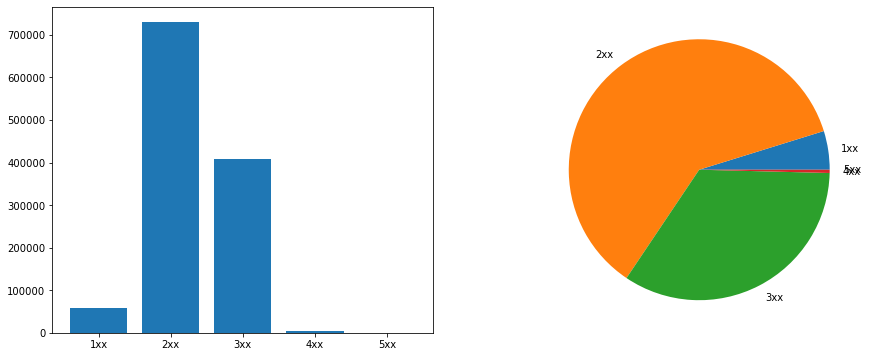

In [105]:
status_labels = ['1xx','2xx','3xx','4xx','5xx']
f, axes = plt.subplots(1,2, figsize=(15,6))
axes[0].bar(status_labels, status_counts)
_ = axes[1].pie(status_counts, labels=status_labels)

### Request Lenght

In [ ]:
train.request_length.describe()

count    1.240227e+06
mean     4.648727e+04
std      3.376622e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.201000e+03
75%      2.741100e+04
max      1.022335e+08
Name: request_length, dtype: float64

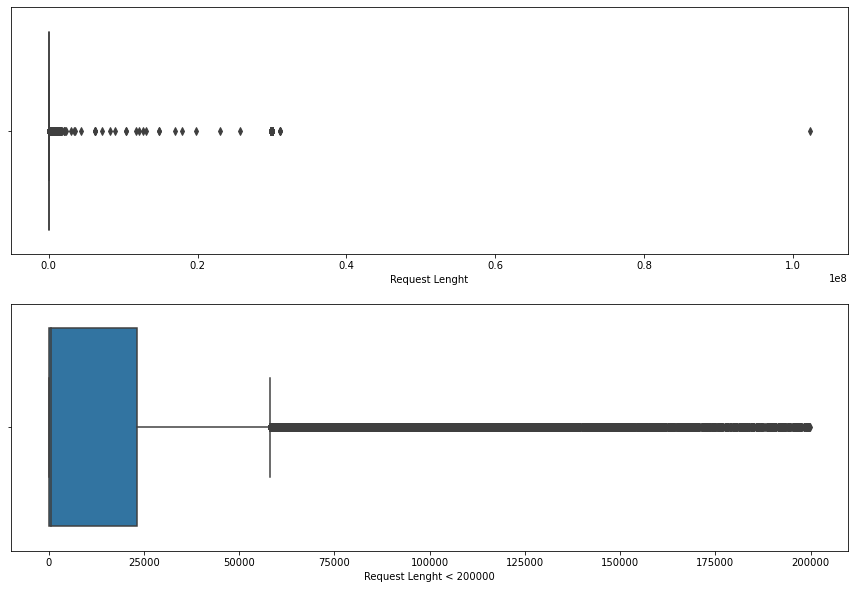

In [106]:
f, axes = plt.subplots(2, figsize=(15,10))
x = sns.boxplot(x=train.request_length, ax=axes[0])
limited_x = sns.boxplot(x=train.request_length[train.request_length < 200000], ax=axes[1])
x.set(xlabel='Request Lenght')
_ = limited_x.set(xlabel='Request Lenght < 200000')

### Request time

In [128]:
temp = train.copy().loc[train.request_time.apply(lambda x: not x.isnumeric())]
temp.head()

,datetime,http_user_agent,ip,status_code,request_length,request_time,http_method,url
25,2021-05-12 05:06:01+04:30,[kube-probe/1.21],-,301,169,-,Get,/
85,2021-05-12 05:06:03+04:30,[kube-probe/1.21],-,301,169,-,Get,/
145,2021-05-12 05:06:05+04:30,[kube-probe/1.21],-,301,169,-,Get,/
175,2021-05-12 05:06:07+04:30,[kube-probe/1.21],-,301,169,-,Get,/
215,2021-05-12 05:06:09+04:30,[kube-probe/1.21],-,301,169,-,Get,/


In [132]:
print(len(temp[temp.ip != '-']))
temp[temp.ip != '-'].head()

1642


,datetime,http_user_agent,ip,status_code,request_length,request_time,http_method,url
776,2021-05-12 05:06:31+04:30,"[[compatible, SemrushBot/7~bl, +http://www.sem...",20.62.177.11,200,53479,-,Get,/pros/1993352776
2010,2021-05-12 05:07:27+04:30,"[[compatible, SemrushBot/7~bl, +http://www.sem...",20.62.177.60,200,55330,-,Get,/pros/1797822247
2708,2021-05-12 05:08:04+04:30,"[[compatible, SemrushBot/7~bl, +http://www.sem...",20.62.177.133,200,20947,-,Get,/pros/763244865
2866,2021-05-12 05:08:18+04:30,"[[Linux, Android 6.0.1, Nexus 5X Build/MMB29P]...",207.213.193.118,301,169,-,Get,/pages/1939232229
3468,2021-05-12 05:08:49+04:30,"[[compatible, SemrushBot/7~bl, +http://www.sem...",20.62.177.4,200,37060,-,Get,/pros/2084824811


In [92]:
train_req_time = train.copy().loc[train.request_time.apply(lambda x: x.isnumeric())]
train_req_time.request_time = train_req_time.request_time.astype('int64')
train_req_time.shape, train.shape

((1180964, 8), (1200000, 8))

In [93]:
train_req_time.request_time.describe()

count    1.180964e+06
mean     6.702212e+03
std      1.882977e+05
min      0.000000e+00
25%      4.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      1.750470e+08
Name: request_time, dtype: float64

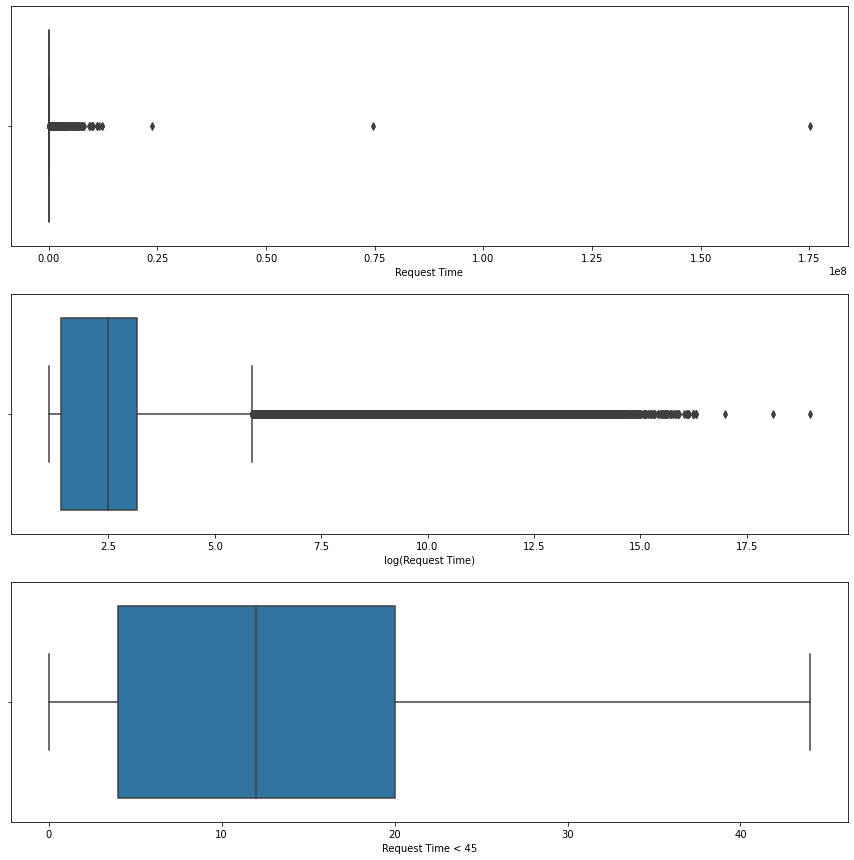

In [94]:
f, axes = plt.subplots(3, figsize=(15,15))

x = sns.boxplot(x=train_req_time.request_time, ax=axes[0])
log_x = sns.boxplot(x=np.log(train_req_time.request_time), ax=axes[1])
limited_x = sns.boxplot(x=train_req_time.request_time[train_req_time.request_time < 45], ax=axes[2])

x.set(xlabel='Request Time')
log_x.set(xlabel='log(Request Time)')
_ = limited_x.set(xlabel='Request Time < 45')

### Http Method

In [95]:
method_count = train.http_method.value_counts()
method_count.values

array([1088276,   61479,   30695,   19413,     137])

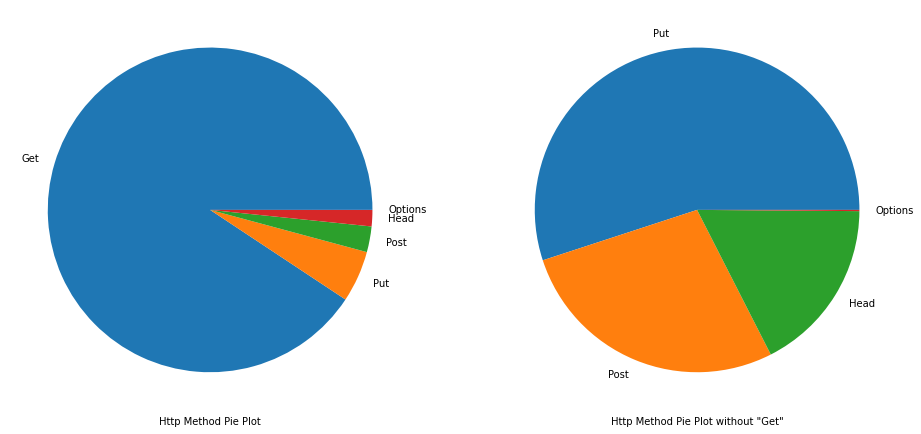

In [96]:
fig, axs = plt.subplots(1,2,figsize=(16,8))

axs[0].pie(train.http_method.value_counts().values, 
          labels=train.http_method.value_counts().index.values)
axs[1].pie(train.http_method[train.http_method != 'Get'].value_counts().values, 
          labels=train.http_method[train.http_method != 'Get'].value_counts().index.values)

axs[0].set(xlabel='Http Method Pie Plot')
_ = axs[1].set(xlabel='Http Method Pie Plot without "Get"')

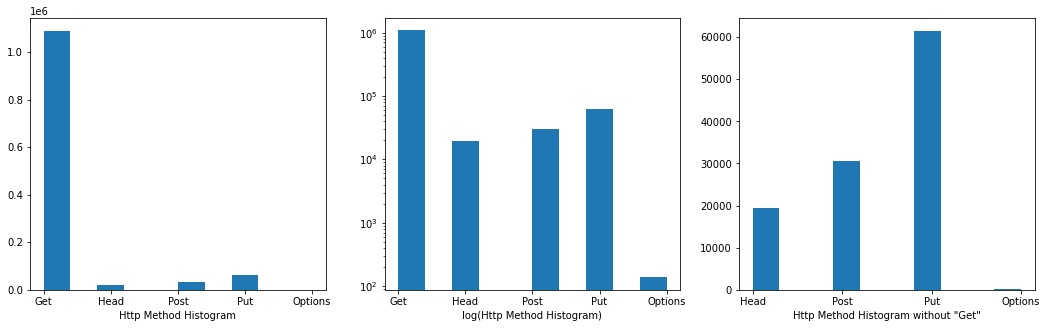

In [97]:
fig, axs = plt.subplots(1,3,figsize=(18,5))

axs[0].hist(train.http_method)
axs[1].hist(train.http_method, log=True)
axs[2].hist(train.http_method[train.http_method != 'Get'])

axs[0].set(xlabel='Http Method Histogram')
axs[1].set(xlabel='log(Http Method Histogram)')
_ = axs[2].set(xlabel='Http Method Histogram without "Get"')

### URL

In [345]:
roots, values = get_path_roots(train.url, MIN_PATH_ROOT_SAMPLE)

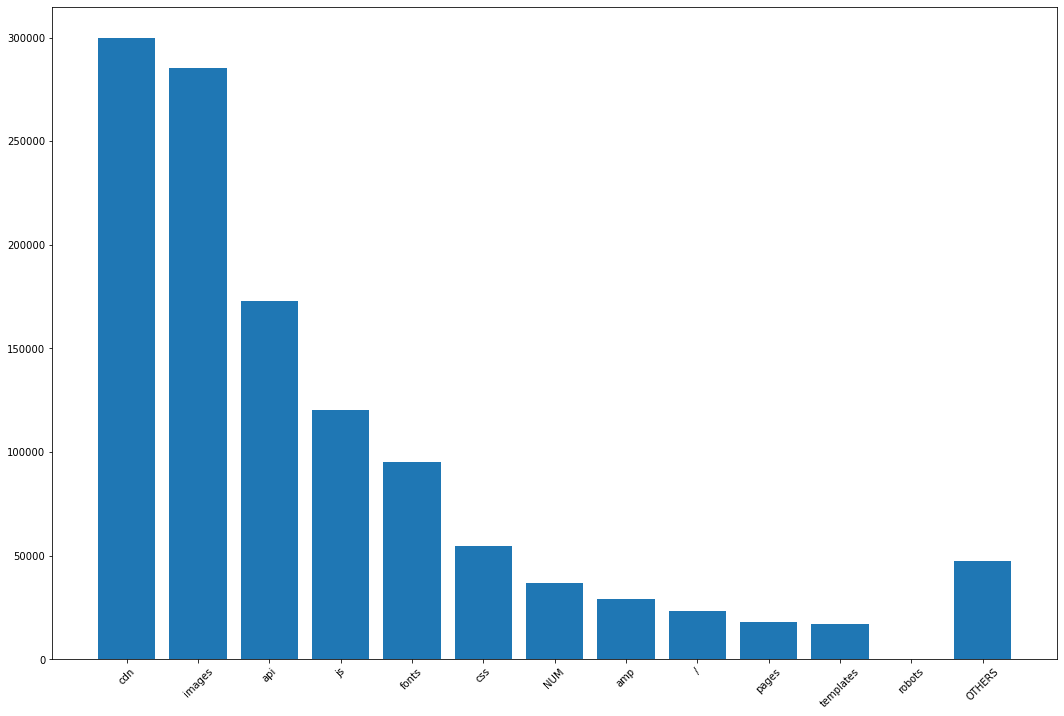

In [347]:
plt.figure(figsize=(18,12))
plt.bar(np.concatenate((roots, ['OTHERS'])), np.concatenate((values, [len(train.url) - sum(values)])))
_ = plt.xticks(rotation=45)

# Preprocess

In [4]:
df.head()

,datetime,http_user_agent,ip,status_code,request_length,request_time,http_method,url
0,2021-05-12 05:06:00+04:30,[Googlebot-Image/1.0],207.213.193.143,304,0,32,Get,/cdn/profiles/1026106239
1,2021-05-12 05:06:00+04:30,[Googlebot-Image/1.0],207.213.193.143,304,0,4,Get,images/badge.png
2,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...",35.110.222.153,200,52567,32,Get,/pages/630180847
3,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0, CAM-L21], [KHTML, like G...",35.108.208.99,200,23531,20,Get,images/fav_icon2.ico
4,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...",35.110.222.153,200,4680,8,Get,images/sanjagh_logo_purpule5.png


In [5]:
encoder = OneHotEncoder()
status_1hot = encoder.fit_transform(df[['status_code']])
method_1hot = encoder.fit_transform(df[['http_method']])
df_cleaned = np.concatenate((
    df.drop(labels=['status_code','http_method'], axis=1), 
    status_1hot.toarray(), 
    method_1hot.toarray()), 
    axis=1)

In [6]:
train = pd.DataFrame(df_cleaned)

In [7]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,2021-05-12 05:06:00+04:30,[Googlebot-Image/1.0],207.213.193.143,0,32,/cdn/profiles/1026106239,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2021-05-12 05:06:00+04:30,[Googlebot-Image/1.0],207.213.193.143,0,4,images/badge.png,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...",35.110.222.153,52567,32,/pages/630180847,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0, CAM-L21], [KHTML, like G...",35.108.208.99,23531,20,images/fav_icon2.ico,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...",35.110.222.153,4680,8,images/sanjagh_logo_purpule5.png,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
train.drop(columns=[0,1,2,5], inplace=True)

In [9]:
train.head()

,3,4,6,7,8,9,10,11,12,13,...,17,18,19,20,21,22,23,24,25,26
0,0,32,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,52567,32,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,23531,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4680,8,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
train_normalized = MinMaxScaler().fit_transform(train)

In [11]:
train_normalized = pd.DataFrame(train_normalized)

In [12]:
from pycaret.anomaly import *
exp_name = setup(data = train_normalized)

,Description,Value
0,session_id,6755
1,Original Data,"(1240227, 23)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,21
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1240227, 44)"
9,CPU Jobs,-1


In [13]:
data_temp = exp_name

In [16]:
pca_based_model = create_model('knn')

In [ ]:
# plot_model(pca_based_model)

IntProgress(value=0, description='Processing: ', max=5)

In [36]:
pca_predictions = predict_model(pca_based_model, data = train_normalized.iloc[500:1000])

In [ ]:
save_model(pca_based_model, 'saved_pca_based_model')

In [37]:
pca_predictions[pca_predictions.Anomaly == 1]

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,Anomaly,Anomaly_Score
509,0.000299,2.879226e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,2.000000e+00
520,0.000299,2.865515e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,3.427667e-07
540,0.000299,2.899792e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,3.427667e-07
541,0.000299,2.874656e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,2.000000e+00
757,0.000523,1.439613e-06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,2.718572e-07
759,0.000180,8.226360e-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,2.258492e-07
880,0.001140,1.687546e-04,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,3.218813e-06
881,0.000256,7.540830e-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,2.138729e-07


In [52]:
pd.DataFrame(df.values).iloc[pca_predictions[pca_predictions.Anomaly == 1].index]

,0,1,2,3,4,5,6,7
509,2021-05-12 05:06:18+04:30,"[[Linux, Android 6.0.1, Nexus 5X Build/MMB29P]...",207.213.193.143,500,30601,5040,Get,/amp/price/1896098538
520,2021-05-12 05:06:19+04:30,"[[compatible, SemrushBot/7~bl, +http://www.sem...",20.62.177.182,503,30601,5016,Get,/pros/2083728304
540,2021-05-12 05:06:20+04:30,"[[compatible, AhrefsBot/7.0, +http://ahrefs.co...",123.252.16.151,503,30601,5076,Get,/pros/206944086
541,2021-05-12 05:06:20+04:30,"[[Linux, Android 6.0.1, Nexus 5X Build/MMB29P]...",207.213.193.143,500,30601,5032,Get,/amp/order/1752208188/1364038687
757,2021-05-12 05:06:30+04:30,"[[compatible, SemrushBot/7~bl, +http://www.sem...",20.62.177.11,200,53479,252,Get,/pros/1993352776
759,2021-05-12 05:06:31+04:30,"[[compatible, AhrefsBot/7.0, +http://ahrefs.co...",123.252.16.192,200,18390,144,Get,/pros/283285878
880,2021-05-12 05:06:42+04:30,"[[Linux, Android 10, JSN-L22], [KHTML, like Ge...",35.96.193.73,101,116557,29540,Get,/api/v2/connect/681925228
881,2021-05-12 05:06:42+04:30,"[[compatible, AhrefsBot/7.0, +http://ahrefs.co...",123.252.16.25,200,26163,132,Get,/pros/666904967


In [34]:
df.describe()

,status_code,request_length,request_time
count,1.240227e+06,1.240227e+06,1.240227e+06
mean,2.303822e+02,4.648727e+04,6.819186e+03
std,5.787077e+01,3.376622e+05,1.845683e+05
min,1.010000e+02,0.000000e+00,0.000000e+00
25%,2.000000e+02,0.000000e+00,4.000000e+00
50%,2.000000e+02,1.201000e+03,1.200000e+01
75%,3.040000e+02,2.741100e+04,2.400000e+01
max,5.030000e+02,1.022335e+08,1.750470e+08


In [39]:
pca_predictions[pca_predictions.Anomaly == 1].index

Int64Index([509, 520, 540, 541, 757, 759, 880, 881], dtype='int64')